In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [13]:
def plot_spec(qobj,w,rlz=None,cn=2,bnum=10,lmin=40,lmax=2048):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    Mkk = np.mean(Skk,axis=0)
    Vkk = np.std(Skk,axis=0)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$10^2L^{0.5}C_L^{\kappa\kappa}$')
    if cn==1:
        errorbar(mb.bc-5,(Okk)/w[4],yerr=Vkk/w[4],fmt='o')
        errorbar(mb.bc-5,(Mkk)/w[4],yerr=Vkk/w[4],fmt='o')
    elif cn==2:
        errorbar(mb.bc-5,(Okk-Mkk)/w[4],yerr=Vkk/w[4],fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [7]:
dirs = local.data_directory()
aobj = local.init_analysis_params(qid='comb_n',ascale=3.,wtype='com16v3')
qobj = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'],bhe=['src'])

In [4]:
w16 = tools_cmb.get_wfactors(['comb_n'],3.,wtype='com16v3')

wfactors: [1.99035681e-02 1.17988937e-06 8.74268232e-11 6.89972364e-15
 5.64587096e-19]


chi: nan , chi (sim mean): nan , chi (sim std): nan , PTE: 0.00 
chi^2: nan , chi^2 (sim): nan , PTE: 0.00 
chi: nan , chi (sim mean): nan , chi (sim std): nan , PTE: 0.00 
chi^2: nan , chi^2 (sim): nan , PTE: 0.00 


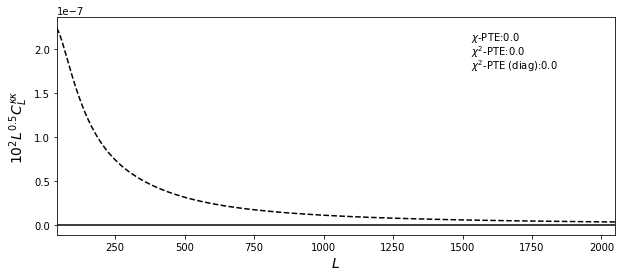

chi: 1.6 , chi (sim mean): -0.0 , chi (sim std): 5.6 , PTE: 0.86 
chi^2: 5.4 , chi^2 (sim): 11.2 , PTE: 0.87 
chi: 1.6 , chi (sim mean): -0.0 , chi (sim std): 5.6 , PTE: 0.86 
chi^2: 4.1 , chi^2 (sim): 11.2 , PTE: 0.96 


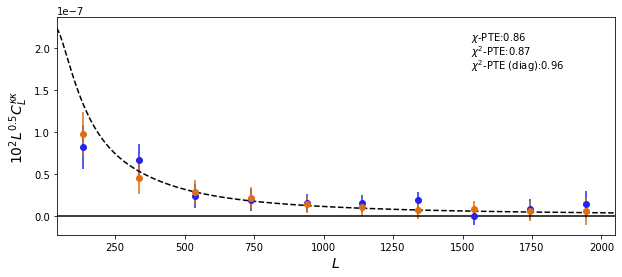

In [14]:
plot_spec(qobj,w16['comb_n'],bnum=10,lmin=40)
plot_spec(qobj,w16['comb_n'],bnum=10,lmin=40,cn=1)